# Beginning
- [Slide: Py06 Pandas and data manipulation](https://docs.google.com/presentation/d/1OP8GcjUUWc9MWxfPNW2Ch47iENpXyOKeMKGzSth1UPs/edit?usp=sharing)
- Pandas cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

**Resource**
- [stackoverflow: Convert to json](https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-dataframe)

# Read data records - 違規藥品廣告
違規藥品廣告資料集 https://data.nat.gov.tw/dataset/14196

In [1]:
import pandas as pd
drug_df = pd.read_csv('https://github.com/P4CSS/PSS/raw/master/data/14196_drug_adv.csv', error_bad_lines = False)
print(drug_df.columns)
print(type(drug_df.columns)) # It's pandas index
#df columns are in Chinese, and we want them to be in English

C:\JupyterLab\resources\jlab_server\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['違規產品名稱', '違規廠商名稱或負責人', '處分機關', '處分日期', '處分法條', '違規情節', '刊播日期',
       '刊播媒體類別', '刊播媒體', '查處情形'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [2]:
%who

drug_df	 pd	 


In [3]:
# assign columns in English
drug_df.columns = ['pname', 'cname', 'agency', 'issuedate', 'law', 'fact', 
              'pubDate', 'pubMediaType', 'pubMedia', 'trace']
drug_df.columns
drug_df.head()

,pname,cname,agency,issuedate,law,fact,pubDate,pubMediaType,pubMedia,trace
0,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y7868533113/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
1,《現貨》大正漢方腸胃藥 60錠,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
2,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
3,日本小林製藥 - 喉嚨噴劑 (現貨),**VIOLA Shop**/代號 Y0899501333/蔡佩蓉,NaN,05 16 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
4,《現貨》日本 小林製藥 命之母 生命之 840錠 女性更年期保養,日本藥妝全職服務現貨快速出/代號 Y4681313568/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分


In [4]:
print(drug_df.pubMediaType) # look inside a column named publicMediaType in drug_df
print(type(drug_df.pubMediaType)) # It's a pandas series
print(set(drug_df.pubMediaType)) # check kinds of value stored in publicMediaType
print(type(set(drug_df.pubMediaType))) # It's a set

# list(drug_df.pubMediaType) # convert pd series in to a list

0       網路
1       網路
2       網路
3       網路
4       網路
        ..
1755    網路
1756    網路
1757    網路
1758    網路
1759    網路
Name: pubMediaType, Length: 1760, dtype: object
<class 'pandas.core.series.Series'>
{'其他', '廣播電台', '電視', '平面媒體', '網路'}
<class 'set'>


## Counting

In [5]:
# counting using 'counter' in 'collections'
from collections import Counter

type_dict = Counter(drug_df.pubMediaType)
print(type(type_dict)) # turns out a collections.Counter, similar to dict
print(type_dict)
print(Counter(drug_df.law))

<class 'collections.Counter'>
Counter({'網路': 1479, '平面媒體': 111, '電視': 86, '廣播電台': 71, '其他': 13})
Counter({nan: 1136, '藥事法第27條': 320, '藥事法第39條': 87, '藥事法第27條藥事法第39條': 58, '藥事法第66條第2項': 57, '藥事法第27條第1項': 12, '菸害防制法第14條': 9, '藥事法第83條': 9, '藥事法第66條第1項': 8, '藥事法22條': 6, '藥事法第22條': 5, '藥事法第27條藥事法第39條藥事法第40條': 4, '藥事法第39條藥事法第27條': 3, '藥事法第22條及第83條': 3, '藥事法第22條,第83條': 2, '藥事法第27條藥事法第27條': 2, '藥事法第27條藥事法第92條': 2, '菸害防制法第14條規定': 2, '藥事法第65條': 2, '違反菸害防制法第14條規定': 2, '藥事法第82條': 2, '健康食品管理法第27條': 1, '化粧品衛生管理條例第24條第1項、第2項': 1, '藥事法第40條藥事法第27條': 1, '違反菸害防制法第14條規定依同法第30條第2項規定': 1, '菸害防制法第14條.第30條第2項': 1, '化粧品衛生管理條例第24條第1項': 1, '違反藥事法第27條第1項與第39條第1項之規定，爰依同法第92條第1項規定處罰鍰新臺幣3萬元整。': 1, '違反菸害防制法第14條': 1, '藥事法第20條藥事法第22條': 1, '藥事法第27條及行政罰法第18條': 1, '藥事法第67條': 1, '化粧品衛生管理條例第24條第2項': 1, '菸害防制法第14條爰依第30條處1000元': 1, '藥事法8283條': 1, '菸害防制法第10條': 1, '藥事法第82.83條': 1, '藥事法第27條地1項規定': 1, '化粧品衛生管理條例第6條第1項': 1, '藥事法第27條藥事法第39條第1項': 1, '藥事法第27條藥事法第39條行政罰法第18條': 1, '藥事法第27條第1項爰依同法第92條第1項復依行政罰法第8條級第18條第3項': 1, '藥事法第27條地1項

In [6]:
drug_df.pubMediaType.value_counts()
print(type(drug_df.pubMediaType.value_counts())) # It's a pandas series
print(drug_df.pubMediaType.value_counts())

<class 'pandas.core.series.Series'>
網路      1479
平面媒體     111
電視        86
廣播電台      71
其他        13
Name: pubMediaType, dtype: int64


In [7]:
# can also written as:
drug_df['pubMediaType'].value_counts()

網路      1479
平面媒體     111
電視        86
廣播電台      71
其他        13
Name: pubMediaType, dtype: int64

# Read JSON data value: Youbike
`df.head()` print out the first 5 entries of data

## M1. Convert to list of dicts by hand

In [8]:
import requests
data = requests.get('https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.gz').json()

# create a list of dict
all_list = []
for k, v in data["retVal"].items():
# #     print(k, v)
    all_list.append(v) # append dict values into an empty list
print(all_list[:2])

# Or, Using list comprehension
# all_list = [v for v in data["retVal"].values()]

# convert list of dict, which is well-performed in storing table form data, into a dataframe
ubike_df = pd.DataFrame(all_list)
ubike_df.head()

[{'sno': '0001', 'sna': '捷運市政府站(3號出口)', 'tot': '180', 'sbi': '27', 'sarea': '信義區', 'mday': '20211028205625', 'lat': '25.0408578889', 'lng': '121.567904444', 'ar': '忠孝東路/松仁路(東南側)', 'sareaen': 'Xinyi Dist.', 'snaen': 'MRT Taipei City Hall Stataion(Exit 3)-2', 'aren': 'The S.W. side of Road Zhongxiao East Road & Road Chung Yan.', 'bemp': '150', 'act': '1'}, {'sno': '0002', 'sna': '捷運國父紀念館站(2號出口)', 'tot': '48', 'sbi': '2', 'sarea': '大安區', 'mday': '20211028205628', 'lat': '25.041254', 'lng': '121.55742', 'ar': '忠孝東路四段/光復南路口(西南側)', 'sareaen': 'Daan Dist.', 'snaen': 'MRT S.Y.S Memorial Hall Stataion(Exit 2.)', 'aren': 'Sec,4. Zhongxiao E.Rd/GuangFu S. Rd', 'bemp': '30', 'act': '1'}]


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,0001,捷運市政府站(3號出口),180,27,信義區,20211028205625,25.0408578889,121.567904444,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,150,1
1,0002,捷運國父紀念館站(2號出口),48,2,大安區,20211028205628,25.041254,121.55742,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",30,1
2,0003,台北市政府,40,3,信義區,20211028205643,25.0377972222,121.565169444,台北市政府東門(松智路) (鄰近信義商圈/台北探索館),Xinyi Dist.,Taipei City Hall,Taipei City Government Eastgate (Song Zhi Road),35,1
3,0004,市民廣場,60,1,信義區,20211028205617,25.0360361111,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,58,1
4,0005,興雅國中,60,0,信義區,20211028205618,25.0365638889,121.5686639,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",56,1


## M2. Using built-in function to pandas

In [9]:
# Using pandas built-in function to convert dictionary to pandas df

import requests
data = requests.get('https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.gz').json()

# if data['retVal'] is a dict, we can use '.from_dict()' method
# every row and column in ubike_df is corresponding to the key-value pairs in data['retVal']
print(type(data['retVal']))
ubike_df = pd.DataFrame.from_dict(data['retVal'], orient='index')
ubike_df.head()

<class 'dict'>


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0001,0001,捷運市政府站(3號出口),180,27,信義區,20211028205625,25.0408578889,121.567904444,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,150,1
0002,0002,捷運國父紀念館站(2號出口),48,2,大安區,20211028205628,25.041254,121.55742,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",30,1
0003,0003,台北市政府,40,3,信義區,20211028205643,25.0377972222,121.565169444,台北市政府東門(松智路) (鄰近信義商圈/台北探索館),Xinyi Dist.,Taipei City Hall,Taipei City Government Eastgate (Song Zhi Road),35,1
0004,0004,市民廣場,60,1,信義區,20211028205617,25.0360361111,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,58,1
0005,0005,興雅國中,60,0,信義區,20211028205618,25.0365638889,121.5686639,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",56,1


# Pandas 1. Observing data

**Oberserving data** `df.info()` and `df.describe()` 觀察各個變數的分佈 to check data type or get basic summary of data 。

## Overview whole df

In [10]:
ubike_df.info()
# if datatype(Dtype) is presented as 'object', values under each column are likely to be string, converted them into int/float if needed

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0001 to 0405
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sno      399 non-null    object
 1   sna      399 non-null    object
 2   tot      399 non-null    object
 3   sbi      399 non-null    object
 4   sarea    399 non-null    object
 5   mday     399 non-null    object
 6   lat      399 non-null    object
 7   lng      399 non-null    object
 8   ar       399 non-null    object
 9   sareaen  399 non-null    object
 10  snaen    399 non-null    object
 11  aren     399 non-null    object
 12  bemp     399 non-null    object
 13  act      399 non-null    object
dtypes: object(14)
memory usage: 46.8+ KB


In [11]:
drug_df.head()

,pname,cname,agency,issuedate,law,fact,pubDate,pubMediaType,pubMedia,trace
0,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y7868533113/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
1,《現貨》大正漢方腸胃藥 60錠,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
2,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
3,日本小林製藥 - 喉嚨噴劑 (現貨),**VIOLA Shop**/代號 Y0899501333/蔡佩蓉,NaN,05 16 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
4,《現貨》日本 小林製藥 命之母 生命之 840錠 女性更年期保養,日本藥妝全職服務現貨快速出/代號 Y4681313568/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分


In [12]:
ubike_df.describe()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
count,399,399,399,399,399,399,399,399,399,399,399,399,399,399
unique,399,399,36,38,12,56,397,398,399,12,398,397,64,2
top,0001,捷運市政府站(3號出口),30,0,大安區,20211028205624,25.045250,121.525322,忠孝東路/松仁路(東南側),Daan Dist.,Nangang Park,The S.W. side of St.Wuchang & Road Longjiang.,19,1
freq,1,1,59,33,48,20,2,2,1,48,2,2,22,389


## Accessing data by index

In [13]:
# Access single row with index location(iloc)
print(drug_df.iloc[2])

pname           《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏
cname                 Y9159169900/鍾青砡
agency                            NaN
issuedate          08 15 2017 12:00AM
law                               NaN
fact                             無照藥商
pubDate             02 3 2017 12:00AM
pubMediaType                       網路
pubMedia                   Yahoo！奇摩拍賣
trace                         相關案件已處分
Name: 2, dtype: object


In [14]:
# Access single col(variable)
drug_df.pubMediaType
drug_df['pubMediaType']

0       網路
1       網路
2       網路
3       網路
4       網路
        ..
1755    網路
1756    網路
1757    網路
1758    網路
1759    網路
Name: pubMediaType, Length: 1760, dtype: object

In [15]:
# Access single cell
print(drug_df.iloc[0, 0])

《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏


## Slicing and accessing to observe data

In [16]:
drug_df[:3]

,pname,cname,agency,issuedate,law,fact,pubDate,pubMediaType,pubMedia,trace
0,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y7868533113/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
1,《現貨》大正漢方腸胃藥 60錠,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
2,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分


In [17]:
drug_df[1:5]

,pname,cname,agency,issuedate,law,fact,pubDate,pubMediaType,pubMedia,trace
1,《現貨》大正漢方腸胃藥 60錠,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
2,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
3,日本小林製藥 - 喉嚨噴劑 (現貨),**VIOLA Shop**/代號 Y0899501333/蔡佩蓉,NaN,05 16 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
4,《現貨》日本 小林製藥 命之母 生命之 840錠 女性更年期保養,日本藥妝全職服務現貨快速出/代號 Y4681313568/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分


In [18]:
drug_df[::100] # subsetting rows multiplied by 100

,pname,cname,agency,issuedate,law,fact,pubDate,pubMediaType,pubMedia,trace
0,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y7868533113/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
100,日本帶回 超好用 Rohto Lycee 小花眼藥水 隱形眼鏡 8ml 全新現貨,strewberry/周小妘,NaN,04 12 2016 12:00AM,藥事法第27條藥事法第39條,無照藥商,01 11 2016 12:00AM,網路,露天,未違規結案
200,05/01現貨 ROIHI-TSUBOKO 痠痛 肩膀 腰局部 溫感/冷感 圓貼布 156枚,toowank/歐子源,NaN,07 12 2016 12:00AM,藥事法第27條藥事法第39條,無照藥商藥品未申請查驗登記,05 16 2016 12:00AM,網路,露天拍賣網站,未違規結案
300,❤藥妝代購❤ 日本原裝 若元胃腸錠 WAKAMOTO 若元錠 1000錠 【現貨】,非廠商/吳政勳,NaN,12 21 2015 12:00AM,藥事法第27條藥事法第39條,無照藥商,05 5 2015 12:00AM,網路,YAHOO！奇摩拍賣,未違規結案
400,胃養健膠囊,平安藥局/吳東諺,花蓮縣,05 10 2016 12:00AM,NaN,刊播未申請核准之廣告,03 9 2016 12:00AM,平面媒體,平安藥局,輔導結案
500,日本帶回 FX COOL 眼藥水 15ML WACOALIS 5度超涼 減緩眼睛疲勞充血,袁華昱/,NaN,10 14 2015 12:00AM,藥事法第27條,無照藥商,03 13 2015 12:00AM,網路,露天,未違規結案
600,"電子煙火點火器 , 日本電子煙品牌 電子煙價格 , 電子煙霧化器 加特林134電子煙二代機械...",非廠商/林?辰(Y3528019251),NaN,07 6 2015 12:00AM,NaN,不得製造、輸入或販賣菸品形狀之任何物品,05 5 2015 12:00AM,網路,NaN,未違規結案
700,力洛膜衣錠(衛部藥輸字第026207號),大統貿易股份有限公司/,臺北市,02 16 2015 12:00AM,NaN,廣告違規,12 3 2014 12:00AM,平面媒體,藥師週刊,輔導結案
800,【MusicBeats】 正品 JEFF煙油 10ml 20種 自由選擇 ( 非電子 煙霧化...,beats450/林晉輝,NaN,12 29 2014 12:00AM,NaN,偽禁藥物標示,10 22 2014 12:00AM,網路,露天拍賣,相關案件已處分
900,康斯丁錠,三禾生物科技有限公司/,NaN,05 22 2015 12:00AM,藥事法第66條第2項,其刊登或宣播之廣告內容與原核准廣告內容不符,03 15 2015 12:00AM,電視,NaN,未違規結案


## Observing single variable

In [19]:
print(type(drug_df.pubMediaType))
print(type(list(drug_df.pubMediaType))) # convert pd series into list
print(drug_df.pubMediaType[:10]) # manipulate pd series just like lists

<class 'pandas.core.series.Series'>
<class 'list'>
0    網路
1    網路
2    網路
3    網路
4    網路
5    網路
6    網路
7    網路
8    網路
9    網路
Name: pubMediaType, dtype: object


In [20]:
drug_df[['pname', 'cname']] #subsetting specific columns

,pname,cname
0,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y7868533113/鍾青砡
1,《現貨》大正漢方腸胃藥 60錠,Y9159169900/鍾青砡
2,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y9159169900/鍾青砡
3,日本小林製藥 - 喉嚨噴劑 (現貨),**VIOLA Shop**/代號 Y0899501333/蔡佩蓉
4,《現貨》日本 小林製藥 命之母 生命之 840錠 女性更年期保養,日本藥妝全職服務現貨快速出/代號 Y4681313568/鍾青砡
...,...,...
1755,全新麵包超人止癢貼片（76入）,非廠商/蕭千容
1756,御岳百草丸,非廠商/吳俊儀
1757,（現貨供應中）日本樂敦，減輕疲憊,非廠商/陳O卿
1758,客製訂單～詹淑惠,非廠商/陳O卿


In [21]:
drug_df1 = drug_df.drop(columns=['pname', 'cname']) # delete multiple colummns
drug_df.head() # drug_df does not covered by the '.drop()' method

,pname,cname,agency,issuedate,law,fact,pubDate,pubMediaType,pubMedia,trace
0,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y7868533113/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
1,《現貨》大正漢方腸胃藥 60錠,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
2,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
3,日本小林製藥 - 喉嚨噴劑 (現貨),**VIOLA Shop**/代號 Y0899501333/蔡佩蓉,NaN,05 16 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
4,《現貨》日本 小林製藥 命之母 生命之 840錠 女性更年期保養,日本藥妝全職服務現貨快速出/代號 Y4681313568/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分


In [22]:
drug_df1.drop(columns=['pubMediaType', 'pubMedia'], inplace=True)
drug_df1.head() # in-place algorithm transforms input directly using no auxiliary data structure

,agency,issuedate,law,fact,pubDate,trace
0,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,相關案件已處分
1,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,相關案件已處分
2,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,相關案件已處分
3,NaN,05 16 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,相關案件已處分
4,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,相關案件已處分


# Pandas 2. Mutating new variables, converting data type

**Cleaning data** `pd.to_numeric(var)` 修改變數型態 to convert data type 

**Mutate new variables** 
* `df = df.assign(new_var = old_var1 / old_var2)` 產生新的變數（方法一） to create or convert new variable. Be careful! You must assign to left to overwrite original df. 
* `df["new_var"] = df.old_var1 / df.old_var2` 產生新的變數（方法二）


In [23]:
slist = ['11', '22', '33']
# print(float(slist)) will turn out error, cannot convert whole datatype of a list at once

# list comprehension
slist = [float(s) for s in slist]
print(slist)

# newlist = []
# for s in slist:
#     newlist.append(float(s))
# newlist

[11.0, 22.0, 33.0]


In [24]:
# create new column ratio = sbi/tot
print(type(ubike_df['sbi'])) # It's a pd series
ubike_df['ratio'] = pd.to_numeric(ubike_df['sbi'])/pd.to_numeric(ubike_df['tot']) # convert whole pd series by '.to_numeric()'
ubike_df.head()

<class 'pandas.core.series.Series'>


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,ratio
0001,0001,捷運市政府站(3號出口),180,27,信義區,20211028205625,25.0408578889,121.567904444,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,150,1,0.150000
0002,0002,捷運國父紀念館站(2號出口),48,2,大安區,20211028205628,25.041254,121.55742,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",30,1,0.041667
0003,0003,台北市政府,40,3,信義區,20211028205643,25.0377972222,121.565169444,台北市政府東門(松智路) (鄰近信義商圈/台北探索館),Xinyi Dist.,Taipei City Hall,Taipei City Government Eastgate (Song Zhi Road),35,1,0.075000
0004,0004,市民廣場,60,1,信義區,20211028205617,25.0360361111,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,58,1,0.016667
0005,0005,興雅國中,60,0,信義區,20211028205618,25.0365638889,121.5686639,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",56,1,0.000000


## Creating `ratio = sbi/tot` for ubike data
`pd.to_numeric()` to covert one variable type

In [25]:
ubike_df = ubike_df.assign(sbi = pd.to_numeric(ubike_df.sbi),
                           tot = pd.to_numeric(ubike_df.tot)) # writing sbi or tot inside '.to_numeric()' will turn out error

ubike_df["ratio1"] = ubike_df.sbi / ubike_df.tot
ubike_df = ubike_df.assign(ratio2 = ubike_df.sbi/ubike_df.tot)
# 'ubike_df.ratio2 = ubike_df.sbi / ubike_df.tot' will turn out error
ubike_df.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,ratio,ratio1,ratio2
0001,0001,捷運市政府站(3號出口),180,27,信義區,20211028205625,25.0408578889,121.567904444,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,150,1,0.150000,0.150000,0.150000
0002,0002,捷運國父紀念館站(2號出口),48,2,大安區,20211028205628,25.041254,121.55742,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",30,1,0.041667,0.041667,0.041667
0003,0003,台北市政府,40,3,信義區,20211028205643,25.0377972222,121.565169444,台北市政府東門(松智路) (鄰近信義商圈/台北探索館),Xinyi Dist.,Taipei City Hall,Taipei City Government Eastgate (Song Zhi Road),35,1,0.075000,0.075000,0.075000
0004,0004,市民廣場,60,1,信義區,20211028205617,25.0360361111,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,58,1,0.016667,0.016667,0.016667
0005,0005,興雅國中,60,0,信義區,20211028205618,25.0365638889,121.5686639,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",56,1,0.000000,0.000000,0.000000


In [26]:
ubike_df.describe()

,tot,sbi,ratio,ratio1,ratio2
count,399.000000,399.00000,399.000000,399.000000,399.000000
mean,36.676692,10.06015,0.287763,0.287763,0.287763
std,14.002628,8.94744,0.231795,0.231795,0.231795
min,14.000000,0.00000,0.000000,0.000000,0.000000
25%,30.000000,3.00000,0.090909,0.090909,0.090909
50%,34.000000,8.00000,0.239130,0.239130,0.239130
75%,40.000000,14.00000,0.423077,0.423077,0.423077
max,180.000000,45.00000,0.968750,0.968750,0.968750


# Pandas 3. Summarize data according to several variables
- Tutorial: [groupby pandas](https://jamesrledoux.com/code/group-by-aggregate-pandas)
* `df.groupby(col1)[col2].count()` summarize col2 according to col1 by counting
* `df.groupby(col1)[col2].mean()` summarize col2 according to col1 by calculating their average of each category
* `df.groupby([col1, col3])[col2].count()` summarize col2 according to col1 and col3 by counting

## Counting single variable

In [28]:
# Conventional way
from collections import Counter
Counter(drug_df.pubMediaType)

Counter({'網路': 1479, '平面媒體': 111, '其他': 13, '廣播電台': 71, '電視': 86})

In [29]:
drug_df.head()

,pname,cname,agency,issuedate,law,fact,pubDate,pubMediaType,pubMedia,trace
0,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y7868533113/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
1,《現貨》大正漢方腸胃藥 60錠,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
2,《現貨》日本熱銷 超人氣SS製藥 痘痘乳膏,Y9159169900/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
3,日本小林製藥 - 喉嚨噴劑 (現貨),**VIOLA Shop**/代號 Y0899501333/蔡佩蓉,NaN,05 16 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分
4,《現貨》日本 小林製藥 命之母 生命之 840錠 女性更年期保養,日本藥妝全職服務現貨快速出/代號 Y4681313568/鍾青砡,NaN,08 15 2017 12:00AM,NaN,無照藥商,02 3 2017 12:00AM,網路,Yahoo！奇摩拍賣,相關案件已處分


In [30]:
# Pandas way
drug_df.pubMediaType.value_counts()

網路      1479
平面媒體     111
電視        86
廣播電台      71
其他        13
Name: pubMediaType, dtype: int64

## groupby then count()

In [34]:
drug_df.groupby('pubMediaType')['pname', 'agency'].count()

C:\Users\user\AppData\Local\Temp/ipykernel_77468/942870560.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drug_df.groupby('pubMediaType')['pname', 'agency'].count()


,pname,agency
pubMediaType,,
其他,13,0
平面媒體,111,111
廣播電台,71,0
網路,1479,0
電視,86,0


## groupby then summarize

Format: `df.groupby(col_for_group)[variable_to_group].func()`

- `col_for_group`: 要作為群組根據的variable，例如將村里彙整為鄉鎮市區資料時，鄉鎮市區資料極為group的根據
- `variable_to_group`: 哪些要根據上述的群組來彙整，通常是值，如上例，那就是人口數、土地面積等。
- `func()`: 要用什麼函式來計算，是要計算每組組內的加總或平均？ 

In [36]:
ubike_df[['sarea', 'tot']].head() # subsetting 'sarea' and 'tot'

,sarea,tot
0001,信義區,180
0002,大安區,48
0003,信義區,40
0004,信義區,60
0005,信義區,60


In [71]:
# sum up tot in each region(town-level)

ubike_df.groupby("sarea")["tot"].min() # '.sum()', '.mean()', '.median()', '.max()', etc

sarea
中山區    16
中正區    24
信義區    20
內湖區    14
北投區    22
南港區    22
士林區    16
大同區    20
大安區    22
文山區    16
松山區    22
萬華區    20
Name: tot, dtype: int64

In [37]:
# sum up tot and sbi in each region(town-level)

ubike_stat = ubike_df.groupby("sarea")["tot", "sbi"].sum()
ubike_stat

C:\Users\user\AppData\Local\Temp/ipykernel_77468/2129354148.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ubike_stat = ubike_df.groupby("sarea")["tot", "sbi"].sum()


,tot,sbi
sarea,,
中山區,1604,374
中正區,1358,324
信義區,1670,524
內湖區,1286,298
北投區,1108,200
南港區,718,208
士林區,1288,453
大同區,748,154
大安區,1950,500


# Pandas 4. Sort-by (Arrange)

In [38]:
# ascending=False to sort by dscending order
ubike_stat.sort_values('tot', ascending=False)

,tot,sbi
sarea,,
大安區,1950,500
信義區,1670,524
中山區,1604,374
中正區,1358,324
士林區,1288,453
內湖區,1286,298
松山區,1210,373
北投區,1108,200
文山區,882,280


In [72]:
ubike_df.sort_values('ratio', ascending=False).head()
# ubike_df.sort_values(by = 'ratio', ascending=False)
# ubike_df.sort_values(by = ['ratio', 'ratio1'], ascending=False) by: str or list of str

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,ratio,ratio1,ratio2
0387,0387,吳興街260巷,32,31,信義區,20211028205628,25.026100,121.563160,吳興街260巷 / 吳興街260巷19弄口(鄰近台北醫學大學),Xinyi Dist.,"Ln. 260,Wuxing St.","Ln. 260, Wuxing St. / Aly. 19, Ln. 260, Wuxing...",1,1,0.968750,0.968750,0.968750
0092,0092,開封西寧路口,42,40,萬華區,20211028205317,25.046618,121.507169,開封街二段/西寧南路(東北側)(鄰近西門町),Wanhua Dist.,Kaifong & Xining Intersection,"The N.E. side of Sec. 2, Kaifeng St. & Xining ...",2,1,0.952381,0.952381,0.952381
0394,0394,松德虎林街口,32,30,信義區,20211028205617,25.038352,121.576248,松德路71號前方,Xinyi Dist.,Songde & Hulin Intersection,"No.71, Songde Rd.",0,1,0.937500,0.937500,0.937500
0193,0193,舊莊區民活動中心,24,22,南港區,20211028205632,25.041277,121.619350,舊莊街一段91巷/舊莊街一段91巷12弄(舊莊區民活動中心前)(鄰近胡適公園),Nangang Dist.,Jiuzhuang Recreation Center,"Ln. 91, Sec. 1, Jiuzhuang St./Aly. 12, Ln. 91,...",1,1,0.916667,0.916667,0.916667
0022,0022,松山車站,44,40,信義區,20211028205616,25.048824,121.57845,松山車站西出口外自行車格內(鄰近饒河街夜市/五分埔),Xinyi Dist.,Songshan Rail Sta.,Bicycle parking lot- West exit in Songshan sta...,3,1,0.909091,0.909091,0.909091


# Pandas 5. rent591

## Using colab

In [ ]:
!wget https://github.com/P4CSS/PSS/raw/master/data/rent591.pkl -O rent591.pkl

import pickle
with open("rent591.pkl", "rb") as fin: # rb: read binary file, pkl is not a pure text file
    list591, df591 = pickle.load(fin)

## Using local PC

In [40]:
#Download data to your local PC and read with jupyter notebook(lab)
import pickle
with open("data/rent591.pkl", "rb") as fin:
    list591, df591 = pickle.load(fin)

In [47]:
df591

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,1,,同安街80巷古亭捷運..,古亭捷運English頂加陽台新套房,古亭捷運English頂加陽台新套房,80巷,4,...,0,同安街,25778,1,元/月,1539641349,266409,vipStyle,,isvip
1,,0,0,1,567號,光復南路W110套房Rentinga..,W110套房Rentingahouse,W110套房Rentingahouse,,18,...,0,光復南路,26211,1,元/月,1539697290,480175,vipStyle,,isvip
2,,0,0,1,,辛亥路二段台灣大學..,台灣大學後門、捷運科技大樓、雙人豪華套房,台灣大學後門、捷運科技大樓、雙人豪華套房,,8,...,0,辛亥路二段,25630,1,元/月,1539264209,1527404,vipStyle,,isvip
3,,0,0,1,23號,成都路27巷新裝潢.優質套..,新裝潢.優質套房(獨立洗衣機)密碼鎖,新裝潢.優質套房(獨立洗衣機)密碼鎖,27巷,4,...,0,成都路,26302,1,元/月,1538530682,2229308,vipStyle,,isvip
4,,0,0,1,32號,中山北路三段公園樹海旁優..,公園樹海旁優質套房,公園樹海旁優質套房,,7,...,0,中山北路三段,25689,1,元/月,1539081089,236887,vipStyle,,isvip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,,0,0,0,,吳興街269巷近台北醫學院，生..,近台北醫學院，生活機能佳，學生租屋優惠。,近台北醫學院，生活機能佳，學生租屋優惠。,269巷,4,...,0,吳興街,26212,1,元/月,1536740044,1950719,,,
2418,,0,0,0,16號,北平東路北平東路-近善導寺,北平東路-近善導寺,北平東路-近善導寺,,12,...,0,北平東路,25770,1,元/月,1536196131,2086066,,,
2419,,0,0,0,,林森北路『★中山站★☆北歐風..,『★中山站★☆北歐風☆全新裝潢☆』,『★中山站★☆北歐風☆全新裝潢☆』,,12,...,0,林森北路,25716,1,元/月,1536042645,815236,,,
2420,,0,0,0,40號,義理街石牌捷運站旁~精美套房..,石牌捷運站旁~精美套房~近商城夜市,石牌捷運站旁~精美套房~近商城夜市,,4,...,0,義理街,26129,1,元/月,1536040024,443596,,,


## Counting renting cases of user_id

In [58]:
rent_count = df591.groupby("user_id")['id'].count() # 'id' is the index row of df591
print(df591.columns)
print(rent_count)
print(type(rent_count)) # It's pandas series, which is passed by df591.groupby("user_id")['id'], and cannot be sorted as df does

Index(['addInfo', 'addition2', 'addition3', 'addition4', 'addr_number_name',
       'address', 'address_img', 'address_img_title', 'alley_name', 'allfloor',
       'area', 'balcony_area', 'browsenum', 'browsenum_all', 'browsenum_name',
       'cartplace', 'cases_id', 'cases_name', 'checkstatus', 'closed',
       'comment_class', 'comment_ltime', 'comment_total', 'comment_unread',
       'condition', 'cover', 'distance', 'filename', 'floor', 'floor2',
       'floorInfo', 'fulladdress', 'groundarea', 'hasimg', 'house_img',
       'houseage', 'houseid', 'houseimg', 'housetype', 'icon_class',
       'icon_name', 'id', 'is_combine', 'isvip', 'kind', 'kind_name',
       'kind_name_img', 'lane_name', 'layout', 'layout_str', 'linkman',
       'living', 'ltime', 'mainarea', 'mvip', 'new_img',
       'new_list_comment_total', 'nick_name', 'onepxImg', 'photoNum',
       'photo_alt', 'post_id', 'posttime', 'price', 'price_hide',
       'refreshtime', 'region_name', 'regionid', 'regionname', 'room'

## Converting Series type to formal DataFrame 

In [75]:
rent_count_df = rent_count.reset_index(name='n') # turn pandas series back as df

print(type(rent_count_df['n'])) # It's pd series
print(type(rent_count_df[['n']])) # after subsetting it is still a df
rent_count_df['n']
rent_count_df

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,user_id,n
0,1736,1
1,2059,2
2,2064,1
3,2148,1
4,2674,1
...,...,...
1544,2485667,1
1545,2485938,1
1546,2486382,1
1547,2486785,1


## Sort by value

In [51]:
rent_count_df.sort_values('n', ascending=False)
# sorted_by_value = sorted(lord_dict.items(), key=lambda kv: kv[1], reverse = True)
# sorted_by_value[:10]

,user_id,n
1074,1318377,44
545,440589,34
1406,2210658,27
753,752838,22
1186,1611062,21
...,...,...
550,443671,1
549,443596,1
547,441026,1
544,439239,1


### Chaining style

In [67]:
rent_count_df = df591.groupby("user_id")['id'].count().reset_index(name='n').sort_values(['n'], ascending=False)

* counting frequency of items in a list
* https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045

## Counting frequency

In [68]:
from collections import Counter
adict = Counter(list(rent_count_df["n"])) # list(rent_count_df) or list(rent_count_df[["n"]]) only turn out a list with column names
print(adict)

Counter({1: 1243, 2: 159, 3: 54, 4: 30, 5: 17, 6: 12, 7: 9, 9: 8, 10: 4, 8: 3, 15: 2, 44: 1, 34: 1, 27: 1, 22: 1, 21: 1, 20: 1, 14: 1, 11: 1})


## (Option) Plotting: matplotlib
* tutorial https://matplotlib.org/tutorials/index.html
* https://matplotlib.org/gallery/pyplots/pyplot_scales.html#sphx-glr-gallery-pyplots-pyplot-scales-py

(array([1.503e+03, 3.200e+01, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  5.3,  9.6, 13.9, 18.2, 22.5, 26.8, 31.1, 35.4, 39.7, 44. ]),
 <BarContainer object of 10 artists>)

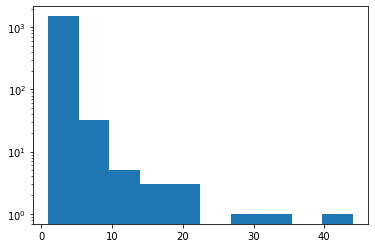

In [69]:
import matplotlib.pyplot as plt
plt.yscale('log') # scaling y axis by Exponential logarithm
plt.hist(list(rent_count_df["n"]))

In [70]:
alist = [[k, v] for k, v in adict.items()]
alist

[[44, 1],
 [34, 1],
 [27, 1],
 [22, 1],
 [21, 1],
 [20, 1],
 [15, 2],
 [14, 1],
 [11, 1],
 [10, 4],
 [9, 8],
 [8, 3],
 [7, 9],
 [6, 12],
 [5, 17],
 [4, 30],
 [3, 54],
 [2, 159],
 [1, 1243]]

# Pandas 6. Pivot to long- or wide-form

In [1]:
import pandas as pd
moi_df = pd.read_csv('https://github.com/P4CSS/PSS/raw/master/data/opendata108Y020.csv', error_bad_lines=False)
moi_df = moi_df[1:]
moi_df.drop(['statistic_yyy'], axis=1, inplace=True)

In [101]:
moi_df['town'] = moi_df['site_id'].str[:3]

In [105]:
moi_df

,district_code,site_id,village,edu_age_15up_total,edu_doctor_graduated_m,edu_doctor_graduated_f,edu_doctor_ungraduated_m,edu_doctor_ungraduated_f,edu_master_graduated_m,edu_master_graduated_f,...,edu_juniorvocational_ungraduated_f,edu_primary_graduated_m,edu_primary_graduated_f,edu_primary_ungraduated_m,edu_primary_ungraduated_f,edu_selftaughtl_m,edu_selftaughtl_f,edu_illiterate_m,edu_illiterate_f,town
1,65000010001,新北市板橋區,留侯里,1441,5,1,2,2,51,31,...,0,26,71,2,6,0,2,0,3,新北市
2,65000010002,新北市板橋區,流芳里,1319,7,2,2,2,49,38,...,0,26,59,0,3,0,0,0,3,新北市
3,65000010003,新北市板橋區,赤松里,790,5,2,0,0,36,36,...,0,18,35,0,5,0,0,1,4,新北市
4,65000010004,新北市板橋區,黃石里,1012,4,2,3,0,27,44,...,0,25,54,0,4,0,0,1,2,新北市
5,65000010005,新北市板橋區,挹秀里,1703,16,5,5,2,88,65,...,0,20,53,5,4,0,1,1,2,新北市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,09007030003,連江縣莒光鄉,西坵村,65,0,0,0,0,0,0,...,0,4,5,0,0,1,0,0,4,連江縣
7757,09007030004,連江縣莒光鄉,福正村,251,0,0,0,0,8,0,...,0,18,12,2,3,2,3,0,7,連江縣
7758,09007030005,連江縣莒光鄉,大坪村,503,0,0,0,0,12,7,...,0,27,39,1,8,2,3,2,16,連江縣
7759,09007040001,連江縣東引鄉,中柳村,551,1,0,2,0,16,15,...,0,20,22,5,4,0,3,2,10,連江縣


In [109]:
town_stat = moi_df.melt(id_vars=['district_code', 'site_id', 'village', 'town'])
town_stat.head()

,district_code,site_id,village,town,variable,value
0,65000010001,新北市板橋區,留侯里,新北市,edu_age_15up_total,1441
1,65000010002,新北市板橋區,流芳里,新北市,edu_age_15up_total,1319
2,65000010003,新北市板橋區,赤松里,新北市,edu_age_15up_total,790
3,65000010004,新北市板橋區,黃石里,新北市,edu_age_15up_total,1012
4,65000010005,新北市板橋區,挹秀里,新北市,edu_age_15up_total,1703


Separate columns into multiple columns
https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

In [111]:
new

,0,1,2,3,4,5
0,edu,age,15up,total,None,None
1,edu,age,15up,total,None,None
2,edu,age,15up,total,None,None
3,edu,age,15up,total,None,None
4,edu,age,15up,total,None,None
...,...,...,...,...,...,...
364715,edu,illiterate,f,None,None,None
364716,edu,illiterate,f,None,None,None
364717,edu,illiterate,f,None,None,None
364718,edu,illiterate,f,None,None,None


In [110]:
new = town_stat["variable"].str.split("_", expand = True) 